# Interpolation vs. Anpassung

Man unterscheidet allgemein zwischen Interpolation und Anpassung/Approximation/Regression:

* **Regression**: Untersuchung der *Korrelation* von Datenpunkten ohne Messfehler mit angenommenem Zusammenhang
* **Fit/Anpassung**: wie die Regression, allerdings unter Berücksichtigung von Messfehlern. 
* **Interpolation**: Hierbei handelt es sich nicht um eine Regression bzw. Approximation. Anstelle eines funktionalen Zusammenhangs, der an die Messwerte angenähert wird, verwendet man Polynome hohen Grades, um eine analytische Kennlinie zu beschreiben, die *exakt* durch alle Messpunkte geht. Für eine große Anzahl von Messwerten wird die Interpolationsfunktion sehr schnell unhandlich. 

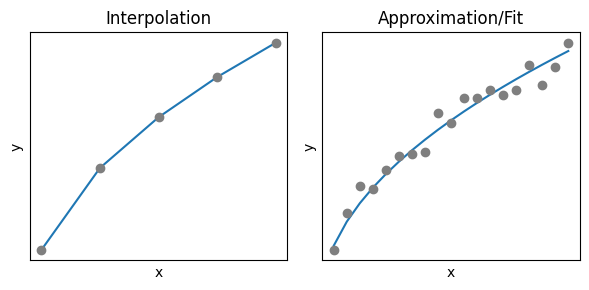

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import interpolate

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(6,3)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

# INTERPOLATION:
plt.subplot(1,2,1)
x = np.arange(10, 200, 40)
y = np.sqrt(x)
plt.plot(x,y,'o', color='tab:gray')

tck = interpolate.splrep(x, y, s=0)
yfit = interpolate.splev(x, tck, der=0)

plt.plot(x,yfit, zorder=0, color = 'tab:blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation')
plt.xticks([])
plt.yticks([])

# ANPASSUNG:
plt.subplot(1,2,2)
x = np.arange(10, 200, 10)
stoerung = np.random.normal(scale=0.6, size=x.shape)
y = np.sqrt(x)+stoerung
plt.plot(x,y,'o', color='tab:gray')

# Anpassung / Fit:
def anpassung(x, a):
    return a*np.sqrt(x)
popt, pcov = curve_fit(anpassung, x, y)
plt.plot(x,anpassung(x,*popt), zorder=0, color = 'tab:blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximation/Fit')
plt.xticks([])
plt.yticks([])

plt.tight_layout()

## Was benutzt man wann und warum?

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Approximation vs. interpolation (englisch, Melvin Leok)

<iframe width="200" height="113" src="https://www.youtube.com/embed/YCBP_PEU8Go?si=wSMKRHgMwS1t2y_U" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

* **Interpolation**...
    * benutzt man bei wenigen Messwerten
    * benutzt man wenn keine Störung die Messung überlagert
    * ist eine analytische Kennlinie, die exakt durch die Messpunkte verläuft (siehe [Kennlinie](2_idealeKennlinie.ipynb))
    * berechnet man unter der Verwendung von z.B. Polynomen (z.B. spline-Methode)
    * ist bei großen Datenmengen sehr unhandlich
* **Approximation/Anpassung/Regression:**...
    * benutzt man bei vielen Messwerten
    * benutzt man bei überlagerten Störungen
    * benutzt man wenn die Interpolation unpraktisch ist
    * ist eine Linearkombination geeigneter analytischer Basisfunktionen
    * ist eine Anpassung eines physikalischen Modells an die Daten